### **Importing Libraries**



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings; warnings.simplefilter('ignore')

### **Loading Data**

In [2]:
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')

#### **Books Data**

In [3]:
books.head()

,Unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [4]:
print(books.shape)

(271360, 9)


In [5]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Unnamed: 0           271360 non-null  int64  
 1   isbn                 271360 non-null  object 
 2   book_title           271360 non-null  object 
 3   book_author          271359 non-null  object 
 4   year_of_publication  266742 non-null  float64
 5   publisher            271360 non-null  object 
 6   image_url_s          271360 non-null  object 
 7   image_url_m          271360 non-null  object 
 8   image_url_l          271357 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 18.6+ MB


#### **Users Data**

In [6]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [7]:
print(users.shape)

(278858, 3)


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


#### **Ratings Data**

In [9]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [10]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
print(ratings.shape)

(1149780, 3)


In [12]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [13]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [14]:
books.duplicated().sum()

0

In [15]:
ratings.duplicated().sum()

0

In [16]:
users.duplicated().sum()

0

### **Data Preparation (Data Cleaning & feature engineering)**

#### **Books Dataset**

In [17]:
#dropping url
# books.drop(['Image-URL-S', 'Image-URL-M', 'Image-URL-L'], axis= 1, inplace= True)

In [18]:
#replacing '-' with '_' and fatueres in lower case
books.columns= books.columns.str.strip().str.lower().str.replace('-', '_')
users.columns = users.columns.str.strip().str.lower().str.replace('-', '_')
ratings.columns = ratings.columns.str.strip().str.lower().str.replace('-', '_')

In [19]:
pd.set_option('display.max_colwidth', None)

In [20]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   unnamed: 0           271360 non-null  int64  
 1   isbn                 271360 non-null  object 
 2   book_title           271360 non-null  object 
 3   book_author          271359 non-null  object 
 4   year_of_publication  266742 non-null  float64
 5   publisher            271360 non-null  object 
 6   image_url_s          271360 non-null  object 
 7   image_url_m          271360 non-null  object 
 8   image_url_l          271357 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 18.6+ MB


##### *now we will check for null values*

In [21]:
print(books.isnull().sum())

unnamed: 0                0
isbn                      0
book_title                0
book_author               1
year_of_publication    4618
publisher                 0
image_url_s               0
image_url_m               0
image_url_l               3
dtype: int64


In [22]:
#nan values in particular column
books.loc[(books['book_author'].isnull()),:]

,unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
187689,187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995.0,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [23]:
books.loc[(books['publisher'].isnull()),:]

,unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


We pointed null values in 'book_author' and 'publisher' feature.

##### *Let's look at the unique years to realize the time period*

In [24]:
# getting unique value from 'year_of_publication' feature
books['year_of_publication'].unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 2030., 1911., 1904., 1949., 1932.,
       1928., 1929., 1927., 1931., 1914., 2050., 1934., 1910., 1933.,
       1902., 1924., 1921., 1900., 2038., 2026., 1944., 1917., 1901.,
       2010., 1908., 1906., 1935., 1806., 2021., 2012., 2006., 1909.,
       2008., 1378., 1919., 1922., 1897., 2024., 1376., 2037.])

##### *Let's check at the corresponding rows in the dataframe.*

In [25]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title'
books[books['year_of_publication'] == 'DK Publishing Inc'] 

,unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


In [26]:
# Extracting and fixing mismatch in feature 'year_of_publication', 'publisher', 'book_author', 'book_title' 
books[books['year_of_publication'] == 'Gallimard']

,unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


##### *There has to make some correction in three rows as you can see in above output. Let's fix it.*

In [27]:
books.loc[221678]

unnamed: 0                                                                                                 221678
isbn                                                                                                   0789466953
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author                                                                                         James Buckley
year_of_publication                                                                                        2000.0
publisher                                                                                       DK Publishing Inc
image_url_s                                          http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
image_url_m                                          http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
image_url_l                                                                             

In [28]:
books.loc[209538]

unnamed: 0                                                                                     209538
isbn                                                                                       078946697X
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author                                                                        Michael Teitelbaum
year_of_publication                                                                            2000.0
publisher                                                                           DK Publishing Inc
image_url_s                              http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image_url_m                              http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image_url_l                                                                                       NaN
Name: 209538, dtype: object

In [29]:
books.loc[220731]

unnamed: 0                                                                   220731
isbn                                                                     2070426769
book_title                                    Peuple du ciel, suivi de 'Les Bergers
book_author                                         Jean-Marie Gustave Le ClÃ?Â©zio
year_of_publication                                                          2003.0
publisher                                                                 Gallimard
image_url_s            http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image_url_m            http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image_url_l                                                                     NaN
Name: 220731, dtype: object

In [30]:
# function to fix mismatch data in feature 'book_title', 'book_author', ' year_of_publication', 'publisher'
def replace_df_value(df, idx, col_name, val):
    df.loc[idx, col_name] = val
    return df

In [31]:
replace_df_value(books, 209538, 'book_title', 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)')
replace_df_value(books, 209538, 'book_author', 'Michael Teitelbaum')
replace_df_value(books, 209538, 'year_of_publication', 2000)
replace_df_value(books, 209538, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 221678, 'book_title', 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)')
replace_df_value(books, 221678, 'book_author', 'James Buckley')
replace_df_value(books, 221678, 'year_of_publication', 2000)
replace_df_value(books, 221678, 'publisher', 'DK Publishing Inc')

replace_df_value(books, 220731,'book_title', "Peuple du ciel, suivi de 'Les Bergers")
replace_df_value(books, 220731, 'book_author', 'Jean-Marie Gustave Le ClÃ?Â©zio')
replace_df_value(books, 220731, 'year_of_publication', 2003)
replace_df_value(books, 220731, 'publisher', 'Gallimard')

,unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,0,0195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,1,0002005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,2,0060973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...
271355,271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988.0,Random House Childrens Pub (Mm),http://images.amazon.com/images/P/0440400988.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440400988.01.LZZZZZZZ.jpg
271356,271356,0525447644,From One to One Hundred,Teri Sloat,1991.0,Dutton Books,http://images.amazon.com/images/P/0525447644.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0525447644.01.LZZZZZZZ.jpg
271357,271357,006008667X,Lily Dale : The True Story of the Town that Talks to the Dead,Christine Wicker,2004.0,HarperSanFrancisco,http://images.amazon.com/images/P/006008667X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/006008667X.01.LZZZZZZZ.jpg
271358,271358,0192126040,Republic (World's Classics),Plato,1996.0,Oxford University Press,http://images.amazon.com/images/P/0192126040.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0192126040.01.LZZZZZZZ.jpg


In [32]:
books.loc[209538]

unnamed: 0                                                                                     209538
isbn                                                                                       078946697X
book_title             DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)
book_author                                                                        Michael Teitelbaum
year_of_publication                                                                            2000.0
publisher                                                                           DK Publishing Inc
image_url_s                              http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg
image_url_m                              http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg
image_url_l                                                                                       NaN
Name: 209538, dtype: object

In [33]:
books.loc[221678]

unnamed: 0                                                                                                 221678
isbn                                                                                                   0789466953
book_title             DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)
book_author                                                                                         James Buckley
year_of_publication                                                                                        2000.0
publisher                                                                                       DK Publishing Inc
image_url_s                                          http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg
image_url_m                                          http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg
image_url_l                                                                             

In [34]:
books.loc[220731]

unnamed: 0                                                                   220731
isbn                                                                     2070426769
book_title                                    Peuple du ciel, suivi de 'Les Bergers
book_author                                         Jean-Marie Gustave Le ClÃ?Â©zio
year_of_publication                                                          2003.0
publisher                                                                 Gallimard
image_url_s            http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg
image_url_m            http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg
image_url_l                                                                     NaN
Name: 220731, dtype: object

Now it is been fixed. We can view perfect matching for their corresponding features.

##### *We've seen there are two missing values in the 'publisher' column. Let's take care of that*

In [35]:
books.loc[(books['publisher'].isnull()),: ]

,unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l


In [36]:
# replacing 'Nan' with 'No Mention'
books.loc[(books['isbn'] == '193169656X'),'publisher'] = 'No Mention'
books.loc[(books['isbn'] == '1931696993'),'publisher'] = 'No Mention'

In [37]:
df = pd.DataFrame(books)
cols = [4]
df = df[df.columns[cols]]

In [38]:
pd.set_option('display.max_columns', None)  
df.head(5)

,year_of_publication
0,2002.0
1,2001.0
2,1991.0
3,1999.0
4,1999.0


In [39]:
books[books['publisher'] == 'No Mention']

,unnamed: 0,isbn,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
128890,128890,193169656X,Tyrant Moon,Elaine Corvidae,2002.0,No Mention,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,129037,1931696993,Finders Keepers,Linnea Sinclair,2001.0,No Mention,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


###### *So we've change the publisher's name from 'NaN' to 'No Mention'.*

#### **Users Dataset**

In [40]:
# users_data size
print(users.shape)

(278858, 3)


In [41]:
# unique value in age
users['age'].unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

There is NaN value in age. We can replace NaN with mean of 'age'

In [42]:
# replacing nan with average of 'age'
users['age'].fillna((users['age'].mean()), inplace=True)

In [43]:
users['age'].unique()

array([ 34.7514337,  18.       ,  17.       ,  61.       ,  26.       ,
        14.       ,  25.       ,  19.       ,  46.       ,  55.       ,
        32.       ,  24.       ,  20.       ,  34.       ,  23.       ,
        51.       ,  31.       ,  21.       ,  44.       ,  30.       ,
        57.       ,  43.       ,  37.       ,  41.       ,  54.       ,
        42.       ,  50.       ,  39.       ,  53.       ,  47.       ,
        36.       ,  28.       ,  35.       ,  13.       ,  58.       ,
        49.       ,  38.       ,  45.       ,  62.       ,  63.       ,
        27.       ,  33.       ,  29.       ,  66.       ,  40.       ,
        15.       ,  60.       ,   0.       ,  79.       ,  22.       ,
        16.       ,  65.       ,  59.       ,  48.       ,  72.       ,
        56.       ,  67.       ,   1.       ,  80.       ,  52.       ,
        69.       ,  71.       ,  73.       ,  78.       ,   9.       ,
        64.       , 103.       , 104.       ,  12.       ,  74. 

In [44]:
# retrieving age data between 5 to 90
users.loc[(users['age'] > 90) | (users['age'] < 5)] = np.nan

In [45]:
users['age'].fillna((users['age'].mean()), inplace=True)

In [46]:
users['age'].unique()

array([34.7514337 , 18.        , 17.        , 61.        , 26.        ,
       14.        , 25.        , 19.        , 46.        , 55.        ,
       32.        , 24.        , 20.        , 34.        , 23.        ,
       51.        , 31.        , 21.        , 44.        , 30.        ,
       57.        , 43.        , 37.        , 41.        , 54.        ,
       42.        , 50.        , 39.        , 53.        , 47.        ,
       36.        , 28.        , 35.        , 13.        , 58.        ,
       49.        , 38.        , 45.        , 62.        , 63.        ,
       27.        , 33.        , 29.        , 66.        , 40.        ,
       15.        , 60.        , 34.73485224, 79.        , 22.        ,
       16.        , 65.        , 59.        , 48.        , 72.        ,
       56.        , 67.        , 80.        , 52.        , 69.        ,
       71.        , 73.        , 78.        ,  9.        , 64.        ,
       12.        , 74.        , 75.        , 76.        , 83.  

As we can see above we don't have any null values for age.

#### **ratings dataset**

In [47]:
ratings.head()

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [48]:
# finding unique ISBNs from rating and book dataset
unique_ratings = ratings[ratings.isbn.isin(books.isbn)]
unique_ratings

,user_id,isbn,book_rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6
...,...,...,...
1149774,276704,0876044011,0
1149775,276704,1563526298,9
1149776,276706,0679447156,0
1149777,276709,0515107662,10


In [49]:
print(ratings.shape)
print(unique_ratings.shape)

(1149780, 3)
(1031136, 3)


In [50]:
# unique ratings from 'book_rating' feature
unique_ratings['book_rating'].unique()

array([ 0,  5,  3,  6,  7,  9,  8, 10,  1,  4,  2], dtype=int64)

### **Data Visualization**

##### **Books Dataset**

###### **Analysis 1**

Which are the top Author with number of books ?

Text(0.5, 1.0, 'Top 20 author with number of books')

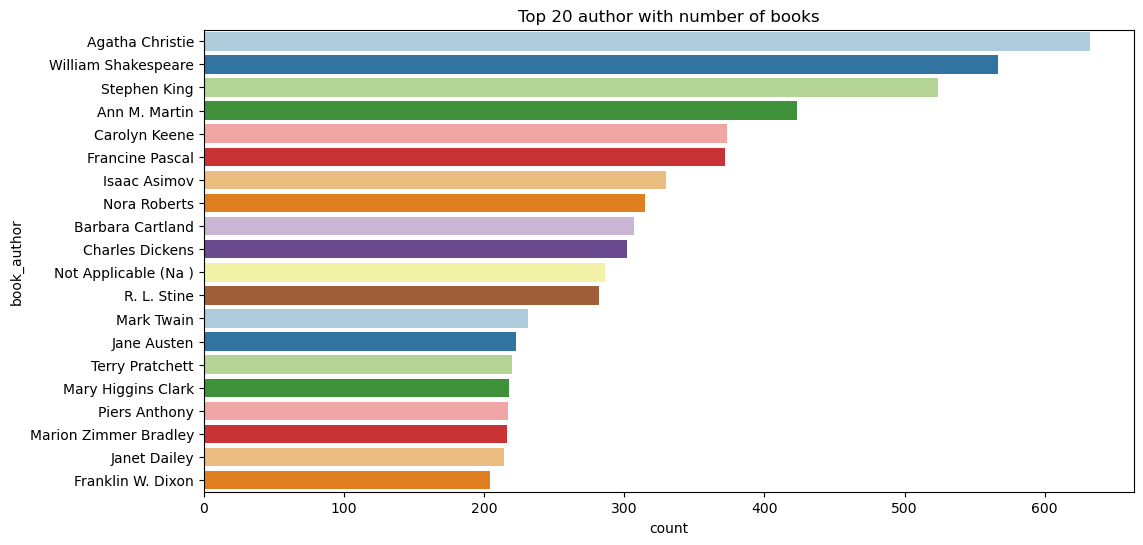

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_author",palette = 'Paired', data=books,order=books['book_author'].value_counts().index[0:20])
plt.title("Top 20 author with number of books")

Agatha Christie is leading at top with more than 600 counts, followed by William Shakespeare. We can plot some hypothesis point :-

* It can happen in some possible cases that Agatha Christie is not a best Author, though Agatha Christie has most number of books as compared to others.
* William Shakespeare is one of the popular Author in the world. Still he doesn't have highest number of books.
* Among all other Authors, it might happen that few of the Author might have some of the best seller books who have millions of copies been sold in world.

###### **Analysis 2**

Which are top publishers with published books ?

Text(0.5, 1.0, 'Top 20 Publishers with number of books published')

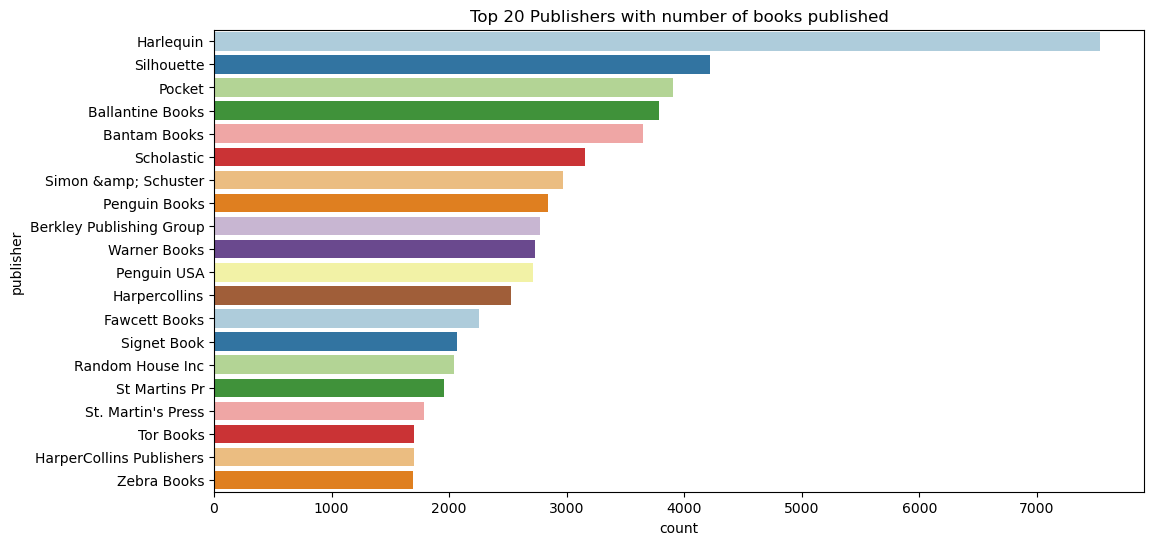

In [52]:
plt.figure(figsize=(12,6))
sns.countplot(y="publisher",palette = 'Paired', data=books,order=books['publisher'].value_counts().index[0:20])
plt.title("Top 20 Publishers with number of books published")

Harlequin has most number of books published, followed by Silhouette. Hypothesis analysis to focus :-

* Some of the top Author's had published their books from Harlequin.
* We can observe Harlequin publiser's marking better performance than any other publishers.
* Penguin Books, Warner Books, Penguin USA, Berkely Publishing Group and many more are among popular publisher's remarking competition with Harlequin.
* Though Penguin Books Publisher has less number of books published but it might happen that only top Author's are approaching towards Penguin Books Publisher.

###### **Analysis 3**

Number of Books published in yearly.

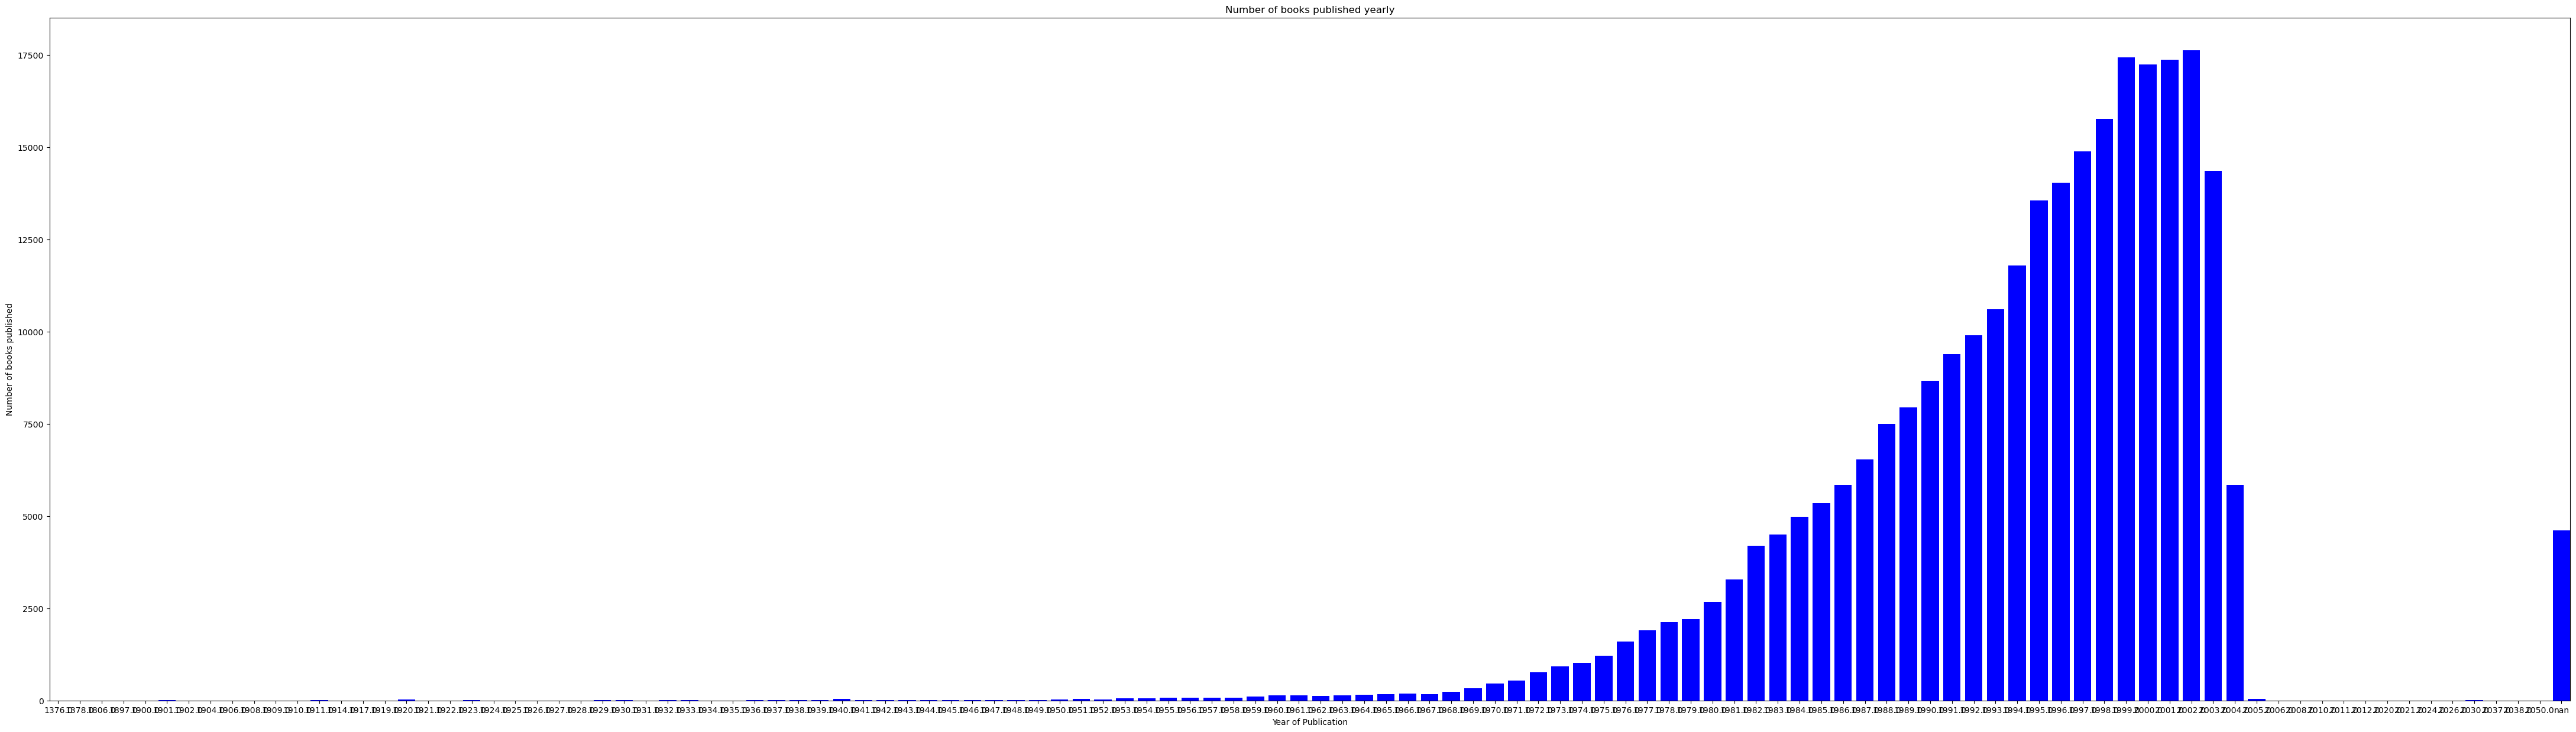

In [53]:
publications = {}
for year in books['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

In [54]:
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors='coerce')

# Checking for 0's or NaNs in Year of Publication
zero_year = books[books.year_of_publication == 0].year_of_publication.count()
nan_year = books.year_of_publication.isnull().sum()

print(f'There are {zero_year} entries as \'0\', and {nan_year} NaN entries in the Year of Publication field')

# Replace all years of zero with NaN
books.year_of_publication.replace(0, np.nan, inplace=True)

There are 0 entries as '0', and 4618 NaN entries in the Year of Publication field


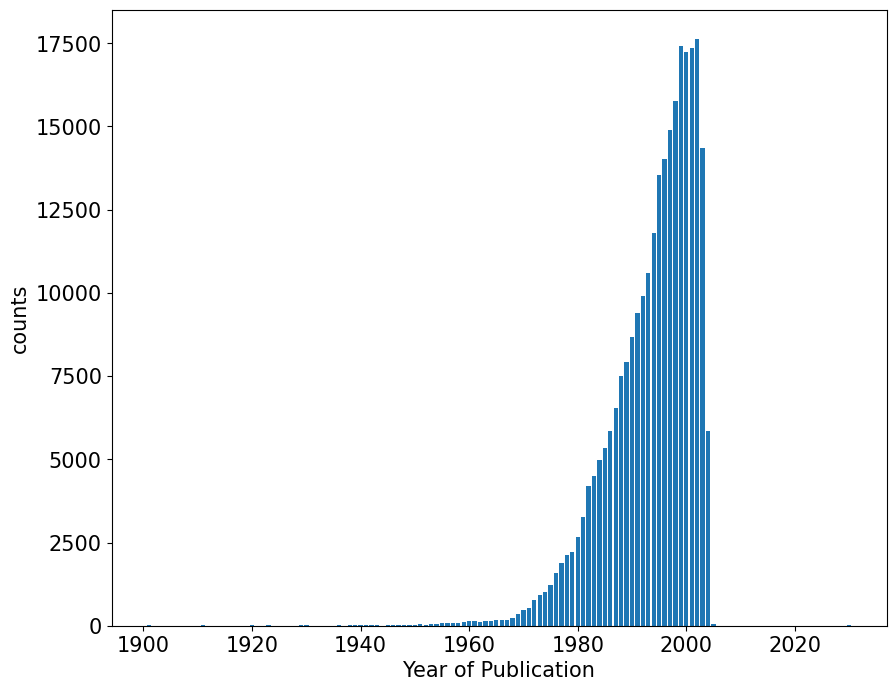

In [55]:
year = books.year_of_publication.value_counts().sort_index()
year = year.where(year>5) 
plt.figure(figsize=(10, 8))
plt.rcParams.update({'font.size': 15}) 
plt.bar(year.index, year.values)
plt.xlabel('Year of Publication')
plt.ylabel('counts')
plt.show()

So we can see publication years are somewhat between 1950 - 2005 here.The publication of books got vital when it starts emerging from 1950. We can get some hyothesis key points:-

* It might happen people starts to understand the importance of books and gradually got productivity habits in their life.
* Every user has their own taste to read books based on what particular subject Author uses. The subject of writing books got emerge from late 1940 slowly. Till 1970 it has got the opportunity to recommend books to people or users what they love to read.
* The highest peak we can observe is between 1995-2001 year. The user understand what they like to read. Looking towards the raise the recommendation is also increase to understand their interest.

##### **Users Dataset**

###### **Analysis 4**

Age distributions of users_data

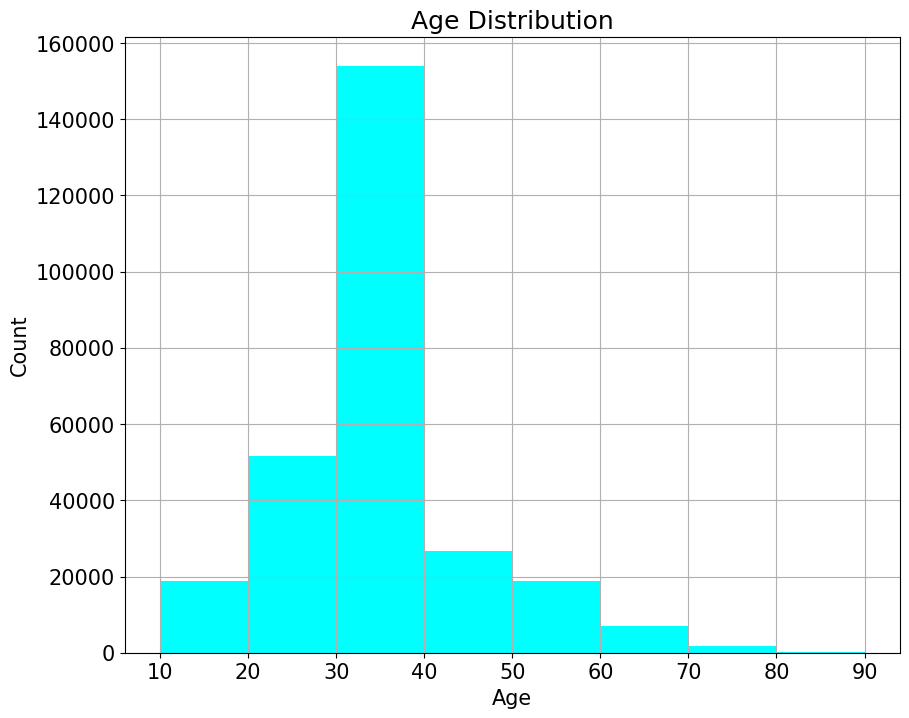

In [56]:
plt.figure(figsize=(10,8))
users.age.hist(bins=[10*i for i in range(1, 10)], color = 'cyan')     
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

Looking towards the users age between 30-40 prefer more and somewhat we can also view between 20-30. Let's make some hypothesis analysis:-

* It is obvious that most of the user books are from Age 30 to 40.
* It might happen that the users are more interested on that subject what Authors are publishing in the market.
* The age group between 20-30 are immensely attracted to read books published by Author.
* We can observe same pitch for Age group between 10-20 and 50-60. There are can be lot of different reasons.

##### **Ratings Dataset**

###### **Analysis 5**

What are top 20 books as per number of ratings ?

Text(0.5, 1.0, 'Top 20 books as per number of ratings')

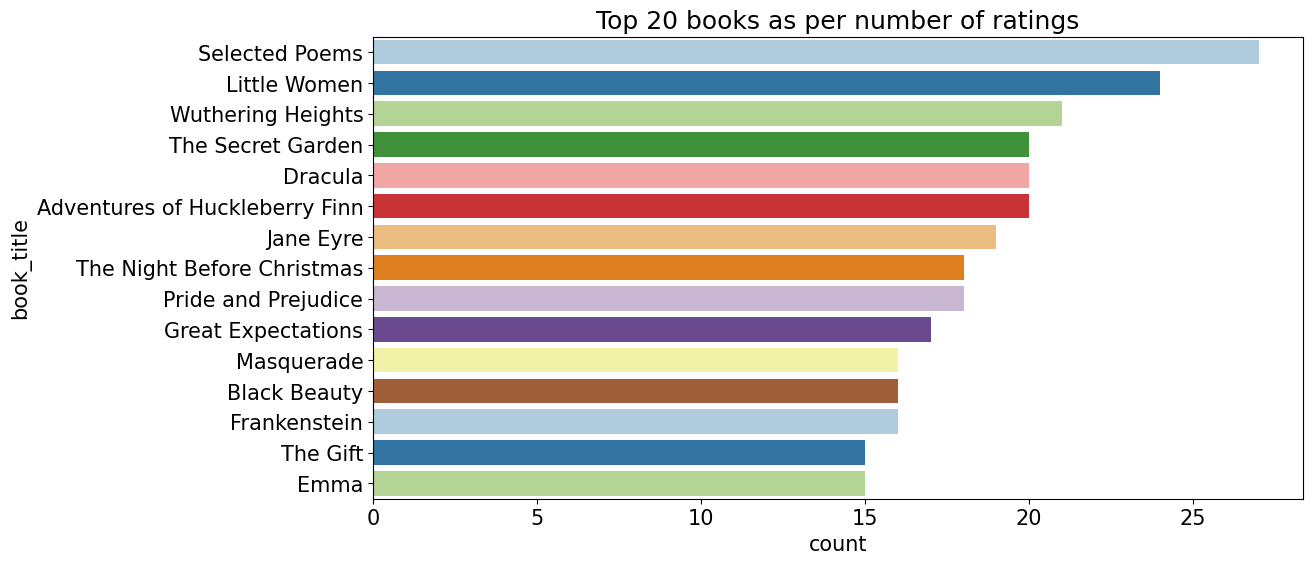

In [57]:
plt.figure(figsize=(12,6))
sns.countplot(y="book_title",palette = 'Paired',data= books, order=books['book_title'].value_counts().index[0:15])
plt.title("Top 20 books as per number of ratings")

As per ratings "Selected Poems" has been rated most followed by "Little Women".

* Selected Poems are most favourable to users as per ratings.
* Three of the books 'The Secret Garden', 'Dracula','Adventures of Huckleberry Finn'are struggling to compete with each other. Similarly, we can observe in 'Masquerade','Black Beauty','Frankenstein'.

<Axes: xlabel='book_rating', ylabel='count'>

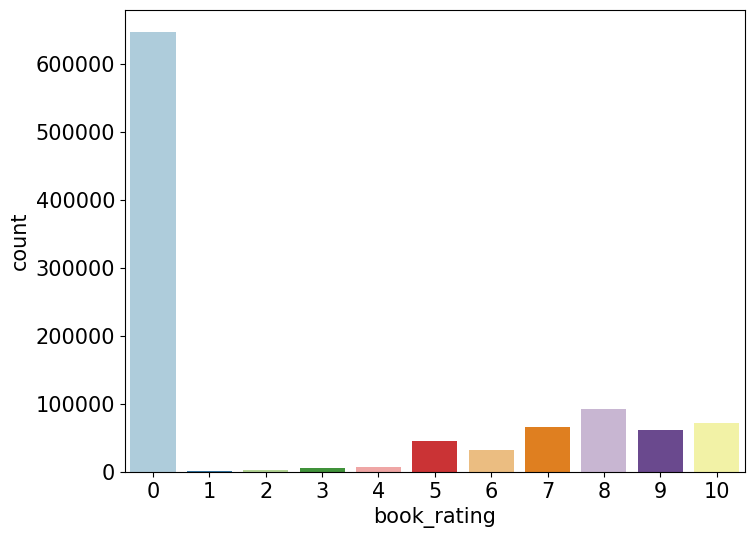

In [58]:
plt.figure(figsize=(8,6))
sns.countplot(x="book_rating",palette = 'Paired',data= unique_ratings)

Firstly the above ratings are unique ratings from 'ratings_data' and 'books_data' dataset. We have to separate the explicit ratings represented by 1–10 and implicit ratings represented by 0. Let's make some hypothesis assumptions :-

* This countplot shows users have rated 0 the most, which means they haven't rated books at all.
* Still we can see pattern to recognize in ratings from 1-10.
* Mostly the users have rated 8 ratings out of 10 as per books. It might happen that the feedback is positive but not extremely positive as 10 ratings (i.e best books ever).

Text(0.5, 1.0, 'Explicit Ratings')

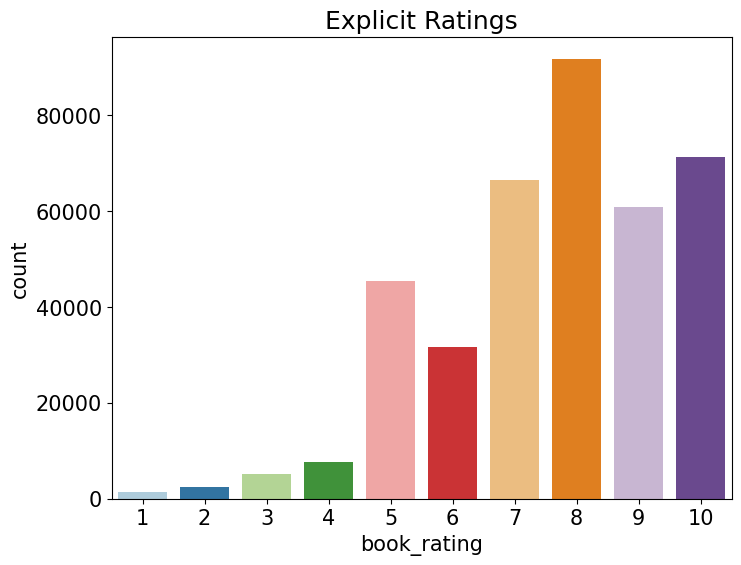

In [59]:
# Explicit Ratings
plt.figure(figsize=(8,6))
rate_data = unique_ratings[unique_ratings['book_rating'] != 0]
sns.countplot(x="book_rating",palette = 'Paired',data=rate_data)
plt.title("Explicit Ratings")

Now this countplot of bookRating indicates that higher ratings are more common amongst users and rating 8 has been rated highest number of times. There can be many assumptions based on ratings of users :-

* Let's take ratings group from 1-4. This can be negative impact for books been published if they have ratings from 1 to 4. It can be issues related to - 1. Language 2. Offend by any chapter's incident/paragraph/Author 3. They've read worst book ever.

* If we think analytical about rating 5, it might happen some same reason as above key points mention.

* For 5 ratings the users might not sure about book ratings whether it's positive or negative impact.

* Let's take ratings group from 6-10. This are positive feedback - 1. It can happen that not every book is perfect in all desire. So, the user's have decided to rate 8.
2. Since 6 ratings is very low among other ratings. 3. As we can aspect 7 and 8 are average and more ratings from users. 4. 9 and 10 ratings are top best ratings based on Author's, Publisher's and Books been published.

# **Popularity Based Recommendation System** 

In [60]:
ratings_with_name = ratings.merge(books, on = 'isbn')

In [61]:
ratings_with_name

,user_id,isbn,book_rating,unnamed: 0,book_title,book_author,year_of_publication,publisher,image_url_s,image_url_m,image_url_l
0,276725,034545104X,0,2966,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,2966,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
2,6543,034545104X,0,2966,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
3,8680,034545104X,5,2966,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
4,10314,034545104X,9,2966,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,69527,Mostly Harmless,Douglas Adams,1995.0,Random House Value Pub,http://images.amazon.com/images/P/0517145553.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0517145553.01.LZZZZZZZ.jpg
1031132,276688,1575660792,7,69496,Gray Matter,Shirley Kennett,1996.0,Kensington Publishing Corporation,http://images.amazon.com/images/P/1575660792.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1575660792.01.LZZZZZZZ.jpg
1031133,276690,0590907301,0,69538,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997.0,Apple,http://images.amazon.com/images/P/0590907301.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0590907301.01.LZZZZZZZ.jpg
1031134,276704,0679752714,0,69545,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997.0,Vintage Books USA,http://images.amazon.com/images/P/0679752714.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0679752714.01.LZZZZZZZ.jpg


In [62]:
num_rating_df = ratings_with_name.groupby('book_title').count()['book_rating'].reset_index()
num_rating_df.rename(columns = {'book_rating' : 'num_ratings'}, inplace = True)
num_rating_df

,book_title,num_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [63]:
avg_rating_df = ratings_with_name.groupby('book_title').mean()['book_rating'].reset_index()
avg_rating_df.rename(columns = {'book_rating' : 'avg_ratings'}, inplace = True)
avg_rating_df

,book_title,avg_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [64]:
popular_df = num_rating_df.merge(avg_rating_df, on = 'book_title')
popular_df

,book_title,num_ratings,avg_ratings
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [65]:
popular_df = popular_df[popular_df['num_ratings'] >= 250].sort_values('avg_ratings', ascending = False).head(50)

In [66]:
popular_df = popular_df.merge(books, on = 'book_title').drop_duplicates('book_title')[['book_title', 'book_author', 'image_url_m', 'num_ratings', 'avg_ratings']]

In [67]:
popular_df

,book_title,book_author,image_url_m,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg,278,5.737410
9,Harry Potter and the Order of the Phoenix (Book 5),J. K. Rowling,http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.01.MZZZZZZZ.jpg,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lord of the Rings,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.01.MZZZZZZZ.jpg,281,5.007117
17,"The Fellowship of the Ring (The Lord of the Rings, Part 1)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.01.MZZZZZZZ.jpg,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.01.MZZZZZZZ.jpg,510,4.700000


# **Collaborative Filtering Based Recommender System**

In [68]:
x = ratings_with_name.groupby('user_id').count()['book_rating'] > 200
padhe_likhe_users = x[x].index

In [69]:
filtered_rating = ratings_with_name[ratings_with_name['user_id'].isin(padhe_likhe_users)]

In [70]:
y = filtered_rating.groupby('book_title').count()['book_rating'] >= 50
famous_books = y[y].index

In [71]:
famous_books

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Day Late and a Dollar Short', 'A Fine Balance',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='book_title', length=706)

In [72]:
final_ratings = filtered_rating[filtered_rating['book_title'].isin(famous_books)]

In [73]:
pt = final_ratings.pivot_table(index = 'book_title', columns = 'user_id', values = 'book_rating')

In [74]:
pt.fillna(0, inplace = True)

In [75]:
pt

user_id,254,2276,2766,2977,3363,4017,4385,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8936,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,16106,16634,16795,16916,16966,17950,18067,18401,19085,19664,20115,20201,21014,21252,21576,21659,22625,23288,23768,23872,23902,24194,24921,25409,25601,25981,26516,26535,26544,26583,26593,27617,28204,28360,28523,28591,29259,29855,30276,30487,30511,30533,30711,30735,30972,31315,31391,31556,31826,31846,32195,32440,32721,32773,33974,35050,35836,35857,35859,36606,36609,36836,36907,37567,37712,37950,38023,38273,38781,39281,39467,39616,39646,39773,40889,40943,41084,41841,42914,43246,43806,43842,44595,44728,46398,47316,48494,49109,49460,49889,50225,51094,51350,51386,51450,51883,52199,52584,52614,52853,52917,53174,53628,53729,54218,55187,55490,55492,55548,55734,55892,56271,56399,56447,56856,56959,59172,59971,60244,60277,60337,60707,61619,62272,62891,62895,63394,63714,63938,64436,65258,66680,67840,68555,69042,69078,69232,69355,69405,69697,69808,69971,70052,70415,70594,71712,72352,72992,73394,73651,75591,75860,76151,76223,76352,76499,76626,76818,76942,77809,77940,78553,78783,78834,78973,79186,79441,80538,80683,81045,81492,81560,81977,82407,82831,82893,82926,83637,84024,85426,85526,85656,85701,85757,85993,86202,86243,86641,87141,87143,87555,87746,87974,88283,88677,88693,88733,88937,89602,91203,91342,91832,91931,92547,92652,92810,92979,93047,93085,93363,93629,94242,94347,94853,94923,95193,95316,95359,95903,95932,95991,96054,96448,97874,98391,98741,98758,100459,100644,100846,100906,101209,101851,101876,102275,102647,102702,102967,104399,104429,104636,104665,105374,105517,105979,106225,106816,107021,107301,107453,107784,107951,108005,108285,108352,109461,109574,109955,110029,110483,110912,110934,110973,111174,111947,112001,112026,112881,113270,113519,113817,113904,113983,114178,114368,114414,114444,114868,114988,115002,115003,115120,115490,116599,117251,117539,119575,120093,120548,122429,122793,122881,123790,123883,123981,124078,124079,124363,124487,124942,125039,125519,125692,125774,126492,126604,126736,127200,127233,127359,127429,127914,128696,128835,129008,129074,129358,129465,129716,129851,130474,130554,130571,131027,131046,131402,131837,131855,132083,133571,133689,133747,133868,135045,135149,135265,135458,135831,136010,136139,136205,136252,136382,137589,137688,138097,138441,138578,138844,139467,139742,140000,140036,140358,141493,141710,142093,142524,143175,143253,143415,143792,144531,144555,145449,145451,145619,145641,146113,146230,146348,147141,147451,147847,147965,148199,148258,148744,149069,149907,149908,149934,150124,150498,150968,150979,151790,151806,152186,152249,153563,153662,153718,154992,155014,155147,155219,155495,156150,156269,156467,157273,157811,158295,159033,159376,159858,160032,160819,161752,162052,162639,162738,163804,163973,164027,164323,164465,164533,164675,164828,165232,165308,165319,166123,166596,167349,167471,167800,168047,168064,168144,168245,169233,169663,169699,170229,170513,170518,170575,170634,170742,170947,171118,172030,172512,172742,173291,173415,173632,173684,173835,174216,174304,174791,175003,175886,177072,177090,177374,177432,177458,177690,178181,178199,178667,178950,179733,179744,179772,179978,180348,180586,180651,180917,180957,181176,181687,182085,182086,182987,182993,183196,183995,184299,185233,185384,186570,187145,187256,187517,188010,189334,189516,189835,189973,190459,190708,190807,190925,191187,192093,193499,193560,194600,194669,195694,196047,196077,196160,196457,196502,197364,197659,197775,198621,198699,198711,199416,199772,200226,200674,201017,201290,201447,201526,201674,201768,201783,203240,203799,203968,204167,204522,204591,204864,205473,205735,205980,206074,206534,206567,206979,207246,207349,207499,207782,208141,208147,208406,208410,208568,208671,208829,209373,209516,209756,209875,210035,210485,210792,210959,211426,211430,211847,211919,212645,212898,212923,212965,213150,213350,214272,214786,216012

In [76]:
#importing cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
similarity_scores = cosine_similarity(pt)

In [78]:
similarity_scores.shape

(706, 706)

In [79]:
similarity_scores

array([[1.        , 0.10255025, 0.01220856, ..., 0.12110367, 0.07347567,
        0.04316046],
       [0.10255025, 1.        , 0.2364573 , ..., 0.07446129, 0.16773875,
        0.14263397],
       [0.01220856, 0.2364573 , 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.12110367, 0.07446129, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.07347567, 0.16773875, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.04316046, 0.14263397, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [80]:
def recommend(book_name):
    if book_name not in pt.index:
        print("Book not found in the index.")
        return

    index = np.where(pt.index == book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[index])), key=lambda x: x[1], reverse=True)[1:6]
    
    data = []
    for i in similar_items:
        item = []
        temp_df = books[books['book_title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('book_title')['book_title'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['book_author'].values))
        item.extend(list(temp_df.drop_duplicates('book_title')['image_url_m'].values))
        
        data.append(item)
        
    return data

In [81]:
recommend('Animal Farm')

[['1984',
  'George Orwell',
  'http://images.amazon.com/images/P/0451524934.01.MZZZZZZZ.jpg'],
 ['Angus, Thongs and Full-Frontal Snogging: Confessions of Georgia Nicolson',
  'Louise Rennison',
  'http://images.amazon.com/images/P/0064472272.01.MZZZZZZZ.jpg'],
 ['Midnight',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425118703.01.MZZZZZZZ.jpg'],
 ['Second Nature',
  'Alice Hoffman',
  'http://images.amazon.com/images/P/0399139087.01.MZZZZZZZ.jpg'],
 ['Call of the Wild',
  'Jack London',
  'http://images.amazon.com/images/P/1559029838.01.MZZZZZZZ.jpg']]

In [82]:
popular_df.to_csv('popular.csv', index=False)

In [83]:
# pt.to_pickle('pt.pkl', protocol=4, encoding='latin1')
import pickle
pickle.dump(pt, open('pt.pkl', 'wb'))
pickle.dump(books, open('books.pkl', 'wb'))
pickle.dump(similarity_scores, open('similarity_scores.pkl', 'wb'))

In [84]:
pip show pandas

Name: pandasNote: you may need to restart the kernel to use updated packages.

Version: 1.5.3
Summary: Powerful data structures for data analysis, time series, and statistics
Home-page: https://pandas.pydata.org
Author: The Pandas Development Team
Author-email: pandas-dev@python.org
License: BSD-3-Clause
Location: C:\ProgramData\anaconda3\Lib\site-packages
Requires: numpy, numpy, python-dateutil, pytz
Required-by: bokeh, datashader, holoviews, hvplot, panel, seaborn, statsmodels, xarray
